In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

[Метрики классификации](#metrica)


In [3]:
data = pd.read_csv('travel_insurance.csv')

In [4]:
data.head(5)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commission (in value),Gender,Age
0,JZI,Airlines,Online,Value Plan,0,12,"TAIWAN, PROVINCE OF CHINA",45.0,15.75,M,39
1,EPX,Travel Agency,Online,Cancellation Plan,0,50,JAPAN,22.0,0.00,None,36
2,EPX,Travel Agency,Online,Cancellation Plan,0,251,BRAZIL,80.0,0.00,None,36
3,EPX,Travel Agency,Online,Cancellation Plan,0,6,INDIA,-10.0,0.00,None,36
4,JZI,Airlines,Online,Value Plan,0,5,CHINA,45.0,15.75,M,34


Признаки, с которыми будем работать:


Agency — название страхового агентства

Agency Type — тип страхового агентства

Distribution Channel — канал продвижения страхового агентства

Product Name — название страхового продукта

Duration — длительность поездки (количество дней)

Destination — направление поездки

Net Sales — сумма продаж ($)

Commission — комиссия страхового агентства ($)

Gender — пол застрахованного

Age — возраст застрахованного

Целевой признак:
Claim (англ. «претензия») — потребовалась ли страховая выплата: «да» — 1, «нет» — 0

In [5]:
data.describe()

,Claim,Duration,Net Sales,Commission (in value),Age
count,50660.000000,50660.000000,50660.000000,50660.000000,50660.000000
mean,0.014864,49.587150,40.749961,9.800755,39.957284
std,0.121009,103.629611,48.470030,19.716468,14.027618
min,0.000000,-2.000000,-389.000000,0.000000,0.000000
25%,0.000000,9.000000,18.000000,0.000000,35.000000
50%,0.000000,22.000000,27.000000,0.000000,36.000000
75%,0.000000,53.000000,49.000000,11.550000,43.000000
max,1.000000,4881.000000,682.000000,262.760000,118.000000



Разбейте исходные данные на две выборки:

обучающую (train);
валидационную (valid). Это 25% исходных данных.

Установите параметр (random_state) равным 12345.

Объявите четыре переменные и запишите в них:

признаки: features_train, features_valid;

целевой признак: target_train, target_valid.

Выведите на экран размеры таблиц, которые хранятся в переменных: features_train и features_valid.

In [6]:
features = data.drop(['Claim'],axis=1)

In [7]:
target = data['Claim']

In [8]:
features_train, features_valid,target_train, target_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

In [9]:
print(features_train.shape)
print(features_valid.shape)

(37995, 10)
(12665, 10)


Принадлежность к категории логистическая регрессия вычисляет по формуле, состоящей из признаков. Они могут быть только численные. Наши данные содержали и категориальные признаки тоже — в этом и была ошибка.

Проверьте, признаки какого типа хранятся в таблице. Выведите их на экран. Затем напечатайте первые пять значений столбца Gender.

In [10]:
print(data.dtypes)

Agency                    object
Agency Type               object
Distribution Channel      object
Product Name              object
Claim                      int64
Duration                   int64
Destination               object
Net Sales                float64
Commission (in value)    float64
Gender                    object
Age                        int64
dtype: object


In [11]:
print(data['Gender'].head(5))

0       M
1    None
2    None
3    None
4       M
Name: Gender, dtype: object


Прямое кодирование
Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения (англ. One-Hot Encoding, OHE).
Принцип работы One-Hot Encoding объясним на значениях признака Gender.
Для каждого значения признака Gender (F, M, None) создаётся столбец: 
Gender_F (от англ. female, «женщина»),
Gender_M (от англ. male, «мужчина»),
Gender_None (данных о поле нет).
Когда ставить единицу в добавленные столбцы, зависит от того, каково значение Gender. Например, если F, то 1 записывается в столбец Gender_F, а M — в Gender_M. 
image

 
Резюмируем. Техникой OHE категориальные признаки переводятся в численные в два этапа:
Для каждого значения признака создаётся новый столбец;
Если объекту категория подходит, присваивается 1, если нет — 0.
Новые признаки (Gender_F, Gender_M, Gender_None) называются дамми-переменными, или дамми-признаками (англ. dummy variable, «фиктивная переменная»).
Для прямого кодирования в библиотеке pandas есть функция pd.get_dummies() (от англ. «получить фиктивные переменные»).

## Преобразуйте колонку Gender техникой OHE.
Вызовите функцию pd.get_dummies() и напечатайте на экране первые пять записей изменённой таблицы.

In [12]:
print(pd.get_dummies(data['Gender'].head(5)))

   M  None
0  1     0
1  0     1
2  0     1
3  0     1
4  1     0


Когда данных в избытке, можно угодить в ловушку фиктивных признаков.

### Дамми-ловушка

Пример:
тобы подать документы на шенгенскую визу, нужно доказать, что деньги у вас есть.

Вы решили перестраховаться, поэтому взяли и выписку с банковского счёта, и справку с работы, и 2-НДФЛ. Хотя визовому центру достаточно двух документов. Вашей модели лишняя информация тоже не очень-то нужна. 

Если оставить всё как есть, обучаться она будет сложнее. 
В таблицу добавились три новых столбца. Поскольку они сильно связаны между собой, один удалим без сожаления. Восстановить столбец можно по оставшимся двум. Так мы не попадём в дамми-ловушку (англ. dummy trap, «ловушка фиктивных признаков»).


Столбец уберём вызовом функции:

### pd.get_dummies() с аргументом drop_first (от англ. «сбросьте первый»).

Он удаляет первую колонку и передаётся как drop_first=True или drop_first=False (True — первый столбец сбрасывается, False — не сбрасывается).

In [13]:
print(pd.get_dummies(data['Gender'],drop_first=True).head(5))

   M  None
0  1     0
1  0     1
2  0     1
3  0     1
4  1     0



Примените прямое кодирование ко всему датафрейму. Вызовите функцию pd.get_dummies() c аргументом drop_first. Сохраните таблицу в переменной data_ohe.
Выведите на экран первые три строки преобразованной таблицы.

In [14]:
data_ohe = pd.get_dummies(data,drop_first=True)

In [15]:
data_ohe.head(3)

,Claim,Duration,Net Sales,Commission (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,...,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA,Destination_ZIMBABWE,Gender_M,Gender_None
0,0,12,45.0,15.75,39,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,50,22.0,0.00,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,251,80.0,0.00,36,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Разбейте исходные данные на две выборки в соотношении 75:25 (%):
обучающую (train);
валидационную (valid).

Объявите четыре переменные и запишите в них:
признаки: features_train, features_valid;
целевой признак: target_train, target_valid.

Вам предстоит освоить альтернативный способ работы с функцией train_test_split(): когда на вход подаются две переменные (признаки и целевой признак). Поработайте с документацией.

Обучите логистическую регрессию.
Напечатайте на экране текст "Обучено!" (уже в прекоде). Так вы убедитесь, что код выполнился без ошибок.

Вложите и в train_test_split(), и в LogisticRegression() параметр random_state, равный 12345.

In [16]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe['Claim']
features = data_ohe.drop('Claim', axis=1)

In [17]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25, random_state = 12345)

In [18]:
model = LogisticRegression(random_state=12345,solver='liblinear')
model.fit(features_train, target_train)
print("Обучено!")

Обучено!


### Порядковое кодирование

Расскажем о другой технике кодирования признаков в решающем дереве и случайном лесе.

Ordinal Encoding (от англ. «кодирование по номеру категории»). Она работает так:

Фиксируется, какой цифрой кодируется класс;

Цифры размещаются в столбце.

Техника подходит для преобразования признаков в решающем дереве и случайном лесе (он состоит из деревьев).

Чтобы выполнить кодирование, в sklearn есть структура данных OrdinalEncoder (англ. «порядковый кодировщик»). Она находится в модуле sklearn.preprocessing (от англ. «предобработка»). 
Импортируем OrdinalEncoder из библиотеки:

from sklearn.preprocessing import OrdinalEncoder 
Преобразование выполняется в три этапа: 

Создаём объект этой структуры данных.
encoder = OrdinalEncoder() 

Чтобы получить список категориальных признаков, вызываем метод fit() — как и в обучении модели. Передаём ему данные как аргумент.
encoder.fit(data) 

Преобразуем данные функцией transform() (англ. «преобразовать»). Изменённые данные будут храниться в переменной data_ordinal (англ. «порядковые данные»).
data_ordinal = encoder.transform(data) 

Чтобы код добавил названия столбцов, оформим данные в структуру DataFrame():
### data_ordinal = pd.DataFrame(encoder.transform(data), columns=data.columns) 
                                                      
Если преобразование признаков требуется лишь один раз, как в нашей задаче, код можно упростить вызовом функции fit_transform() (от англ. «подогнать и преобразовать»).
Она объединяет функции: fit() и transform(). 


### data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns=data.columns) 

Преобразуйте признаки техникой Ordinal Encoding.
Импортируйте OrdinalEncoder из модуля sklearn.preprocessing. 

Сохраните результат в переменной data_ordinal. Оформите данные в структуру DataFrame().

Напечатайте на экране первые пять строк таблицыю

In [19]:
encoder = OrdinalEncoder()

In [20]:
data_ordinal = pd.DataFrame(encoder.fit_transform(data), columns = data.columns)

In [21]:
print(data_ordinal.head(5))

   Agency  Agency Type  Distribution Channel  Product Name  Claim  Duration  \
0     9.0          0.0                   1.0          24.0    0.0      14.0   
1     7.0          1.0                   1.0          10.0    0.0      52.0   
2     7.0          1.0                   1.0          10.0    0.0     253.0   
3     7.0          1.0                   1.0          10.0    0.0       8.0   
4     9.0          0.0                   1.0          24.0    0.0       7.0   

   Destination  Net Sales  Commission (in value)  Gender   Age  
0        121.0      602.0                  486.0     1.0  37.0  
1         61.0      470.0                    0.0     2.0  34.0  
2         16.0      735.0                    0.0     2.0  34.0  
3         54.0      121.0                    0.0     2.0  34.0  
4         24.0      602.0                  486.0     1.0  32.0  



Обучите решающее дерево на преобразованных данных. Напечатайте на экране текст  "Обучено!"  (уже в прекоде). Так вы убедитесь, что код выполнился без ошибок

In [22]:
features = data_ordinal.drop('Claim',axis=1)
target = data_ordinal['Claim']

In [23]:
features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

In [24]:
model = DecisionTreeClassifier(random_state=12345)

In [25]:
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=12345)

In [26]:
print('Обучено!')

Обучено!


### Подведём итог:

Когда все признаки должны стать количественными-подходит техника OHE;

Если все признаки категориальные, и их нужно преобразовать в числа — Ordinal Encoding.

Почему Ordinal Encoding не подходит для логистической регрессии? Она всё норовит посчитать по формуле. Если речь идёт о признаке Age, то это разумно, а вот с Gender есть трудности. Например, сложив значения «1» и «0» («женщина» и «мужчина») и разделив на «2», «средний пол» не получить.

### Масштабирование признаков

Что делать, если у признаков разный масштаб? Стандартизировать их!
В данных есть столбцы: Age и Commission. Допустим, возможен возраст от 0 до 100 лет, а страховая комиссия — от 100 долларов до 1000. Значения и их разбросы в столбце Commission больше, поэтому алгоритм автоматически решит, что этот признак важнее возраста. А это не так: все признаки значимы.
Чтобы избежать этой ловушки, признаки масштабируют — приводят к одному масштабу.
Один из методов масштабирования — стандартизация данных. 
Предположим, что все признаки распределены нормально, среднее (англ. mean, M) и дисперсия (лат. dispersio, D) определяются по выборке. Значения признака преобразуются по формуле:
Новое значение = Старое значение - М, поделённое на квадратный корень из D.
У нового признака устанавливается среднее, равное 0, и дисперсия, равная 1.
В sklearn есть отдельная структура для стандартизации данных — StandardScaler (от англ. «преобразователь масштаба методом стандартизации»). Он находится в модуле sklearn.preprocessing. 

Стандартизируйте численные признаки. Импортируйте StandardScaler из модуля sklearn.preprocessing.
Создайте объект структуры StandardScaler() и настройте его на обучающих данных. В переменной numeric уже есть список всех численных признаков.
Сохраните преобразованные обучающую и валидационную выборки в переменных: features_train и features_valid. 
Напечатайте на экране первые пять строк таблицы.

При записи изменённых признаков в исходный датафрейм код может вызывать предупреждение SettingWithCopy. Причина в особенности поведения sklearn и pandas.  Специалисты уже привыкли игнорировать такое сообщение.

In [27]:
#Чтобы предупреждение не появлялось, в код добавляют строчку:
pd.options.mode.chained_assignment = None
scaller = StandardScaler()
scaller.fit(features_train[numeric])

NameError: name 'numeric' is not defined

In [28]:
numeric = ['Duration', 'Net Sales', 'Commission (in value)', 'Age']

In [29]:
features_train[numeric] = scaller.transform(features_train[numeric])
features_valid[numeric] = scaller.transform(features_valid[numeric])

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [30]:
print(features_train.head(5))

       Agency  Agency Type  Distribution Channel  Product Name  Duration  \
33312     7.0          1.0                   1.0          10.0      79.0   
50154     7.0          1.0                   1.0          10.0      22.0   
26729     7.0          1.0                   1.0          10.0      15.0   
37842     7.0          1.0                   1.0           1.0      44.0   
23588     7.0          1.0                   1.0           1.0      10.0   

       Destination  Net Sales  Commission (in value)  Gender   Age  
33312         24.0      414.0                    0.0     2.0  34.0  
50154        113.0      398.0                    0.0     2.0  34.0  
26729         76.0      343.0                    0.0     2.0  28.0  
37842        124.0      597.0                    0.0     2.0  33.0  
23588         76.0      457.0                    0.0     2.0  32.0  


## Метрики классификации
<a id='metrica'></a>

In [31]:
datam = pd.read_csv('travel_insurance_preprocessed.csv')

Обучите модель решающего дерева.

Посчитайте значение accuracy на валидационной выборке.

Сохраните результат в переменной accuracy_valid.

Напечатайте его на экране.

In [32]:
features = datam.drop('Claim',axis=1)
target = datam['Claim']

In [33]:
features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

In [34]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train,target_train)

DecisionTreeClassifier(random_state=12345)

In [35]:
predict_valid = model.predict(features_valid)

In [36]:
accuracy_valid = accuracy_score(target_valid,predict_valid)

In [37]:
print(accuracy_valid)

0.974496644295302


## Проверка адекватности модели

Доля правильных ответов — 97%. Это много или мало?

Исследуем целевой признак.
Чтобы оценить адекватность модели, проверим, как часто в целевом признаке встречается класс «1» или «0».

Количество уникальных значений подсчитывается методом value_counts().

Он группирует строго одинаковые величины.


Для подсчёта классов в целевом признаке примените метод value_counts(). Сделайте частоты относительными (от 0 до 1): в этом поможет документация Pandas.
Значения сохраните в переменной class_frequency. Напечатайте их на экране. 
Методом plot() c аргументом kind='bar' постройте диаграмму.

In [38]:
class_frequency = data['Claim'].value_counts(normalize = True)

In [39]:
print(class_frequency)

0    0.985136
1    0.014864
Name: Claim, dtype: float64


<AxesSubplot:>

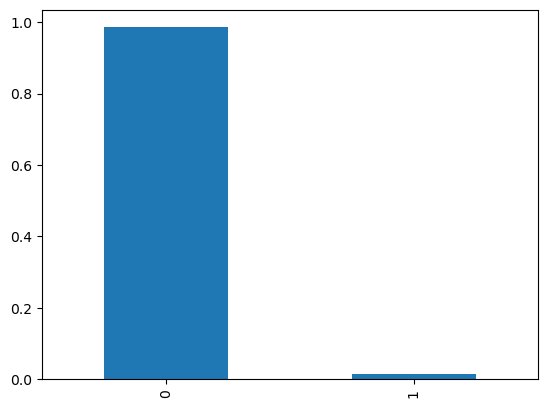

In [40]:
class_frequency.plot(kind='bar')

Проанализируйте частоты классов в результатах предсказаний решающего дерева (переменная predicted_valid). 

Всё то же самое:

Примените метод value_counts(). Сделайте частоты относительными.

Значения сохраните в переменной class_frequency. Напечатайте их на экране.

Методом plot() c аргументом kind='bar' постройте диаграмму.

In [41]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predict_valid = pd.Series(model.predict(features_valid))

0    0.985946
1    0.014054
dtype: float64


<AxesSubplot:>

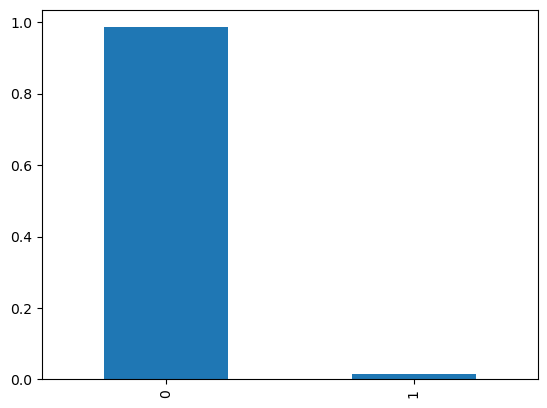

In [42]:
class_frequency = predict_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind = 'bar')

Cоздайте константную модель: любому объекту она прогнозирует класс «0». Сохраните её предсказания в переменной target_pred_constant. 
Напечатайте на экране значение accuracy.

In [43]:
target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target, target_pred_constant))  

0.9851362021318595


Вы уже знаете, что класс с меткой «1» называется положительным, с меткой «0» — отрицательным.
Если сравнить эти ответы с предсказаниями, получается такое деление:
истинно положительные (англ. True Positive, TP) и истинно отрицательные ответы (англ. True Negative, TN);
ложноположительные (англ. False Positive, FP) и ложноотрицательные ответы (англ. False Negative, FN).
Резюмируем. Характеристики «положительный» и «отрицательный» относятся к предсказанию, а «истинный» и «ложный» — к его правильности.

Истинно положительные ответы
Справиться с дисбалансом и более точно классифицировать ответы помогут новые метрики.
Что значит истинно положительный ответ (TP)? Модель пометила объект единицей, и его настоящее значение тоже — 1.
В нашей задаче истинно положительный ответ — это количество застрахованных, которые:
по прогнозу модели обратились за компенсацией;
фактически запросили страховую выплату.

In [44]:
#пример предсказаний и правильных ответов.
#Посчитайте количество TP-ответов и напечатайте результат на экране.
target = pd.Series([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])
predictions = pd.Series([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1])

In [45]:
print(len([i for i in range(len(target)) if target[i]==1 and predictions[i]==1]))

5


Истинно отрицательные ответы
Если предсказанное и фактическое значение класса отрицательные, ответ истинно отрицательный.
В нашей задаче истинно отрицательный ответ (TN) — это количество застрахованных, которые:
по прогнозу модели не запросили выплату;
фактически не обратились за компенсацией по страховке.

In [46]:
#Посчитайте количество TN-ответов.
#Напечатайте результат на экране.
print(len([i for i in range(len(target)) if target[i]==0 and predictions[i]==0]))

4


### Ложноположительные ответы

Алгоритмы имеют право на ошибки. Только двух видов.
Ошибка первого рода — это ложноположительные ответы (FP). Они возникают, когда модель предсказала «1», а вот действительное значение класса — «0».

В нашей задаче ложноположительный ответ — это количество застрахованных, которые:

по прогнозу модели запросили выплату;

фактически не обратились за компенсацией.

In [47]:
print(len([i for i in range(len(target)) if target[i]==0 and predictions[i]==1]))

3


### Ложноотрицательные ответы

Ошибка второго рода — ложноотрицательные ответы (FN).
Ложноотрицательные ответы появляются, когда модель предсказала «0», а действительное значение класса — «1».

В нашей задаче ложноотрицательный ответ — это количество застрахованных, которые:

по прогнозу модели не запросили выплату;

фактически обратились за компенсацией.

In [48]:
print(len([i for i in range(len(target)) if target[i]==1 and predictions[i]==0]))

2


Матрица ошибок
TP, FP, TN, FN собираются в одну таблицу — матрицу ошибок, или матрицу неточностей (англ. сonfusion matrix).
Матрица формируется так:
по горизонтали («Предсказания») располагаются метки алгоритма от 0 до 1;
по вертикали («Ответы») — истинные метки класса от 0 до 1.
Что получаем:
По главной диагонали (от верхнего левого угла) выстроены правильные прогнозы:
TN в левом верхнем углу;
TP в правом нижнем углу.
Вне главной диагонали — ошибочные варианты:
FP в правом верхнем углу;
FN в левом нижнем углу.

   0    _______  TrueNegative     _____FalsePositive
   
   1    _______   FalseNegative   ______ TruePositive
   
             0               1
             
Наглядно представить результаты вычислений метрик точности и полноты позволяет матрица ошибок.

Матрица неточностей находится в знакомом модуле sklearn.metrics. 

Функция confusion_matrix() принимает на вход верные ответы и предсказания, а возвращает матрицу ошибок.

In [49]:
# Рассчитайте матрицу ошибок функцией confusion_matrix(). 
# Импортируйте её из модуля sklearn.metrics.
# Напечатайте результат на экране.
print(confusion_matrix(target,predictions))

[[4 3]
 [2 5]]


Постройте матрицу ошибок для решающего дерева.

Как и в прошлом задании, вызовите функцию confusion_matrix(). 

Напечатайте результат на экране.

In [50]:
data = pd.read_csv('travel_insurance_preprocessed.csv')

In [51]:
features = data.drop('Claim',axis=1)
target = data['Claim']

In [52]:
ftrs_tr,ftrs_valid,trgt_tr,trgt_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

In [53]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(ftrs_tr,trgt_tr)

DecisionTreeClassifier(random_state=12345)

In [54]:
predicted_valid = model.predict(ftrs_valid)

In [55]:
print( confusion_matrix(trgt_valid,predicted_valid))

[[12330   166]
 [  157    12]]


### Полнота
Матрица ошибок поможет построить новые метрики. Начнём с полноты (англ. recall).

Полнота выявляет, какую долю положительных среди всех ответов выделила модель. Обычно они на вес золота, и важно понимать, как хорошо модель их находит. 
Recall рассчитывается по такой формуле:

### Recall = TP / (TP + FN)

Разберём на примере нашей задачи:
за компенсацией обратились 100 застрахованных. Это количество всех положительных объектов, или TP + FN;

модель определила из них правильно только 20;

recall равна 0.2.
Полнота — это доля TP-ответов среди всех, у которых истинная метка 1.

Хорошо, когда значение recall близко к единице: модель хорошо ищет положительные объекты. 

Если ближе к нулю — модель надо перепроверить и починить.



Найдите в модуле sklearn.metrics функцию, которая отвечает за вычисление полноты.

Импортируйте её. 

Функция принимает на вход верные ответы и предсказания, а возвращает долю правильных ответов, найденных моделью. Напечатайте результат на экране.

In [56]:
rec = recall_score(trgt_valid,predicted_valid)

### Точность

Ещё одна метрика для оценки качества прогноза целевого класса — точность (англ. precision).
Точность определяет, как много отрицательных ответов нашла модель, пока искала положительные. Чем больше отрицательных, тем ниже точность.
Precision рассчитывается по такой формуле:
Precision = TP / (TP + FP)
Разберём на примере нашей задачи:
по прогнозу модели за компенсацией обратится 100 застрахованных. Это количество всех объектов с положительным прогнозом, или TP + FP;
20 из них действительно запросили страховую выплату (предсказание совпало с ответом, и ответ положительный — TP).
precision равна 0.2.
Напомним, TP — это истинно положительные ответы. FP — отмеченные моделью положительные ответы. Нам нужна точность, близкая к единице.

In [57]:
# Найдите в модуле sklearn.metrics функцию, которая отвечает за вычисление точности. Импортируйте её. 
# Функция принимает на вход верные ответы и предсказания. 
# Возвращает, какая доля объектов, отмеченных моделью как положительные, на самом деле такие.
# Напечатайте результат на экране.
precis = precision_score(target_valid, predicted_valid)

In [58]:
f1 = 2*(rec*precis)/(rec+precis)


In [59]:
f1

0.069164265129683

In [60]:
f1 = f1_score(trgt_valid,predicted_valid)

In [61]:
f1

0.069164265129683

### Взвешивание классов

Придадим объектам редкого класса больший вес.
Например, вы готовитесь к экзаменам и проходите тест. За решение одного вида задач вы получите один балл, другого — два. Чтобы получить более высокую оценку, вы сосредоточились только на «двухбалльных» задачах. Так и модели проще запоминать объекты бóльшей значимости.
Алгоритмы машинного обучения считают все объекты обучающей выборки равнозначными по умолчанию. Если важно указать, что какие-то объекты важнее, их классу присваивается вес (англ. class_weight, «вес класса»).
В алгоритме логистической регрессии в библиотеке sklearn есть аргумент class_weight. По умолчанию он равен None, т. е. классы равнозначны:
вес класса «0» = 1.0
вес класса «1» = 1.0


Если указать class_weight='balanced' (англ. «сбалансированный»), алгоритм посчитает, во сколько раз класс «0» встречается чаще класса «1». Обозначим это число N (неизвестное количество раз). Новые веса классов выглядят так:
вес класса «0» = 1.0
вес класса «1» = N
Бóльший вес будет у редкого класса.

Аргумент class_weight также есть у решающего дерева и случайного леса.

In [62]:
#делайте веса классов сбалансированными.
#Обратите внимание, как изменится значение F1-меры.
data = pd.read_csv('travel_insurance_preprocessed.csv')

In [63]:
features = data.drop('Claim',axis=1)
target = data['Claim']

In [64]:
features_train,features_valid,target_train,target_valid=train_test_split(features,target,test_size=0.25,random_state=12345)

In [65]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)


LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='liblinear')

In [66]:
predict_valid = model.predict(features_valid)

In [67]:
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.069164265129683


### Увеличение выборки

Как сделать объекты редкого класса не такими редкими в данных?
Теперь в тесте за решение любой задачи вы получаете 1 балл. Самые важные задачи повторяются по несколько раз, чтобы их легче запомнить. 

Когда обучают модели, такая техника называется upsampling (от англ. up, «вверх»; sampling, «выборка»).

Преобразование проходит в несколько этапов:
Разделить обучающую выборку на отрицательные и положительные объекты;
Скопировать несколько раз положительные объекты;
С учётом полученных данных создать новую обучающую выборку;
Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

Скопировать объекты несколько раз поможет синтаксис умножения списков в Python. Чтобы повторить элементы списка, он умножается на число (нужное количество раз):
answers = [0, 1, 0]
print(answers)
answers_x3 = answers * 3
print(answers_x3) 
[0, 1, 0]
[0, 1, 0, 0, 1, 0, 0, 1, 0] 

.
Мы разделили обучающую выборку на отрицательные и положительные объекты. 
Объявите четыре переменные и запишите в них:

features_zeros — признаки объектов с ответом «0»;

features_ones — признаки объектов с ответом «1»;

target_zeros — целевой признак объектов, у которых ответы только «0»;

target_ones — целевой признак объектов, у которых ответы только «1».
Напечатайте на экране размеры таблиц, которые хранятся в четырёх переменных (уже в прекоде).

In [68]:
target = data['Claim']
features = data.drop('Claim', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# < напишите код здесь >
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

In [69]:
print( features_zeros.shape,'\n',features_ones.shape)
print( target_zeros.shape,'\n',target_ones.shape)

(37411, 196) 
 (584, 196)
(37411,) 
 (584,)


Продублируйте объекты положительного класса и объедините их с объектами отрицательного класса. Чтобы соединить таблицы, воспользуйтесь функцией pd.concat() (от англ. concatenate, «сцепить»). Поработайте с документацией.
Мы объединили таблицы с признаками и сохранили результат в переменной features_upsampled (признаки, преобразованные техникой upsampling). Сделайте то же самое для целевого признака и объявите переменную target_upsampled (целевой признак, преобразованный техникой upsampling). 
Количество повторений уже сохранено в переменной repeat (англ. «повторять»).
Напечатайте на экране размеры новых переменных (в прекоде).

In [70]:
repeat = 10
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) 

target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)

In [71]:
print(features_upsampled.shape,'\n',target_upsampled.shape)

(43251, 196) 
 (43251,)


Перемешайте данные. Импортируйте функцию shuffle() (англ. «перетасовать») из модуля sklearn.utils (от англ. «утилиты»).
Создайте функцию upsample() с тремя параметрами:

features — признаки,

target — целевой признак,

repeat — количество повторений.
Функция вернёт признаки и целевой признак после операции upsampling.
Вызовите функцию для обучающих данных. Если всё будет верно, размеры преобразованных выборок появятся на экране.

In [72]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat) 
    target_upsampled = pd.concat([target_zeros]+[target_ones]*repeat)
    
    return shuffle(features_upsampled,target_upsampled)

In [73]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

In [74]:
model = LogisticRegression(random_state = 12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid =model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.13714285714285715


### Уменьшение выборки

Как сделать объекты частого класса не такими частыми?
Вместо повторения важных вопросов убрать часть неважных.
Это можно сделать техникой downsampling (от англ. down — «вниз»; sampling — «выборка»).
Преобразование проходит в несколько этапов:
Разделить обучающую выборку на отрицательные и положительные объекты;
Случайным образом отбросить часть из отрицательных объектов;
С учётом полученных данных создать новую обучающую выборку;
Перемешать данные. Положительные не должны идти следом за отрицательными: алгоритмам будет сложнее обучаться.

Чтобы выбросить из таблицы случайные элементы, примените функцию sample(). На вход она принимает аргумент frac (от англ. fraction, «доля»). Возвращает случайные элементы в таком количестве, чтобы их доля от исходной таблицы была равна frac.

print(features_train.shape)

features_sample = features_train.sample(frac=0.1, random_state=12345)

print(features_sample.shape) 
(37995, 196)
(3800, 196) 
Чтобы ваши результаты сошлись с нашими, указывайте random_state=12345.

Чтобы выполнить downsampling, напишите функцию downsample() с тремя аргументами:

features — признаки;

target — целевой признак;

fraction — доля отрицательных объектов, которые нужно сохранить.

Функция вернёт признаки и целевой признак после операции downsampling.
Вызовите функцию для обучающих данных с аргументом fraction, равным 0.1. Код выведет на экран размеры выборок.

In [75]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # < напишите код здесь >
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [76]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

In [100]:
#Обучите на новых данных модель LogisticRegression. 
#Найдите для неё значение F1-меры, и код выведет его на экран.
model = LogisticRegression(random_state = 12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
score = model.score(features_valid, target_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.13333333333333333


### Изменение порога

Изменим значение порога и посмотрим, какими станут метрики.
В библиотеке sklearn вероятность классов вычисляет функция 

predict_proba() (от англ. predict probabilities, «предсказать вероятности»).

На вход она получает признаки объектов, а возвращает вероятности:
probabilities = model.predict_proba(features) 
Строки соответствуют объектам. В первом столбце указана вероятность отрицательного класса, а во втором — положительного (сумма вероятностей равна единице). Выведем их на экран.

In [101]:
probabilities = model.predict_proba(features)

Найдите значения вероятностей классов для валидационной выборки. 

Значения вероятностей класса «1» сохраните в переменной probabilities_one_valid.

Напечатайте на экране первые пять элементов этой переменной (уже в прекоде).

In [102]:
probabilities_one_valid = probabilities[:,1:]

In [103]:
print(probabilities_one_valid[:5])

[[0.08614001]
 [0.01569162]
 [0.02874363]
 [0.00794546]
 [0.08628918]]


Переберите значения порогов от 0 до 0.3 с шагом 0.02. Найдите для каждого значения точность и полноту. 

Напечатайте результаты на экране (в прекоде).
Чтобы создать цикл с нужным диапазоном, мы применили функцию arange() (от англ. «упорядочивать») библиотеки numpy.

Как и range(), функция перебирает указанные элементы диапазона, но работает не только с целыми, но и дробными числами. 

Средства библиотеки numpy вы ещё изучите.

In [109]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]


In [110]:
for threshold in np.arange(0, 0.3, 0.02):
    predicted_valid = probabilities_one_valid > threshold # < напишите код здесь >
    precision = precision_score(target_valid, predicted_valid)# < напишите код здесь >
    recall = recall_score(target_valid, predicted_valid)# < напишите код здесь >

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}".format(
        threshold, precision, recall))
    

Порог = 0.00 | Точность = 0.013, Полнота = 1.000
Порог = 0.02 | Точность = 0.052, Полнота = 0.645
Порог = 0.04 | Точность = 0.061, Полнота = 0.609
Порог = 0.06 | Точность = 0.072, Полнота = 0.367
Порог = 0.08 | Точность = 0.097, Полнота = 0.254
Порог = 0.10 | Точность = 0.112, Полнота = 0.178
Порог = 0.12 | Точность = 0.146, Полнота = 0.107
Порог = 0.14 | Точность = 0.033, Полнота = 0.012
Порог = 0.16 | Точность = 0.036, Полнота = 0.006
Порог = 0.18 | Точность = 0.000, Полнота = 0.000
Порог = 0.20 | Точность = 0.000, Полнота = 0.000
Порог = 0.22 | Точность = 0.000, Полнота = 0.000
Порог = 0.24 | Точность = 0.000, Полнота = 0.000
Порог = 0.26 | Точность = 0.000, Полнота = 0.000
Порог = 0.28 | Точность = 0.000, Полнота = 0.000


### ROC-кривая
Мы стали свидетелями нового противостояния — TPR против FPR. Изобразим его на графике.

По горизонтали нанесём долю ложноположительных ответов (FPR), а по вертикали — долю истинно положительных ответов (TPR). Переберём значения порога логистической регрессии и проведём кривую. 
Она называется ROC-кривая, или кривая ошибок (от англ. receiver operating characteristic, «характеристика работы приёмника»; термин пришёл из теории обработки сигналов).

Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение TPR и лучше качество модели.

Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»).

Это новая метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5.

Построить ROC-кривую поможет функция roc_curve() (англ. ROC-кривая) из модуля sklearn.metrics:

#### from sklearn.metrics import roc_curve 

На вход она принимает значения целевого признака и вероятности положительного класса. Перебирает разные пороги и возвращает три списка: значения FPR, значения TPR и рассмотренные пороги.
fpr, tpr, thresholds = roc_curve(target, probabilities) 

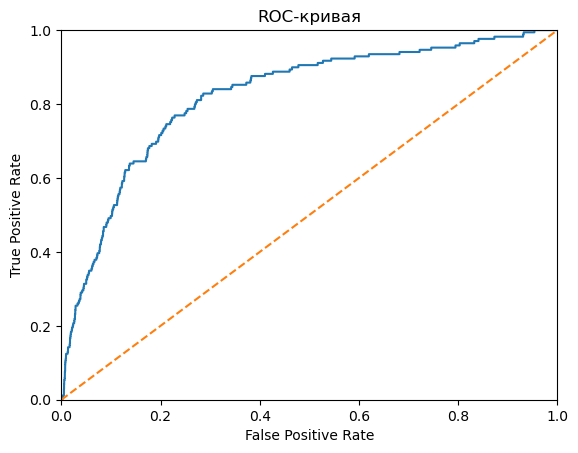

In [114]:
# Постройте ROC-кривую для логистической регрессии и изобразите её на графике.
# Вам поможет инструкция в коде. 
# Для удобства мы уже добавили в код график ROC-кривой случайной модели.
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) # < напишите код здесь >

plt.show()
plt.figure()# < постройте график >
plt.plot(fpr, tpr)

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim([0.0, 1.0])# < примените функции plt.xlim() и plt.ylim(), чтобы
plt.ylim([0.0, 1.0])#   установить границы осей от 0 до 1 >

plt.xlabel('False Positive Rate')# < примените функции plt.xlabel() и plt.ylabel(), чтобы
plt.ylabel('True Positive Rate')#   подписать оси "False Positive Rate" и "True Positive Rate" >

plt.title('ROC-кривая')# < добавьте к графику заголовок "ROC-кривая" функцией plt.title() >

plt.show()

In [117]:
#roc_auc_score 
# Посчитайте для логистической регрессии AUC-ROC. 
# В документации sklearn найдите, как функция расчёта этой площади называется и как она работает.
# Импортируйте её. 
# Напечатайте  значение AUC-ROC на экране.
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
print(auc_roc)

0.8222702270643766
